In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

orders_df = pd.read_csv("./orders.csv", sep=";")
orders_products_df = pd.read_csv("./orders_products.csv", sep=";")
products_df = pd.read_csv("./products.csv", sep=";")
route_segments_df = pd.read_csv("./route_segments.csv", sep=";")

In [2]:
wastedT_df = pd.read_csv("./drivers_wasted.csv")
avg_del_by_driver = pd.read_csv("./drivers_avg_delivery_data.csv")
avg_del_by_sector = pd.read_csv("setor_avg_delivery_data.csv")

In [3]:
wastedT_df = wastedT_df.set_index("driver_id")
wastedT_df

,WastedTime,avg_WastedTimeByStop,stops_count
driver_id,,,
1,145922,979.3423,149
2,76267,786.2577,97
3,113894,819.3813,139
4,94088,863.1927,109


In [4]:
avg_del_by_driver

,sector_id,driver_id,avg_deliveryTime,amount_orders,avg_order_weight
0,1,1,88.1902,205,6694.3463
1,1,2,257.5902,183,6660.3060
2,1,3,436.9831,177,6237.8531
3,1,4,623.3103,174,6839.4483
4,2,1,236.7578,161,6849.3602
5,2,2,262.9674,184,6295.1250
6,2,3,307.5779,199,5987.1709
7,2,4,443.5846,195,6611.0154
8,3,1,321.4885,217,6519.0230
9,3,2,462.7711,166,6430.3373


In [5]:
avg_del_by_sector = avg_del_by_sector.set_index("sector_id")
avg_del_by_sector

,avg_deliveryTime,amount_orders
sector_id,,
1,339.6752,739
2,316.9296,739
3,308.9692,779


In [6]:
rs_o_df = route_segments_df.merge(orders_df, how="left", on="order_id")
rs_o_df["delivery_time"]=(pd.to_datetime(rs_o_df['segment_end_time']) - pd.to_datetime(rs_o_df['segment_start_time'])).dt.total_seconds()

# rs_o_df

In [7]:
grouped = rs_o_df[(rs_o_df['segment_type'] == "STOP") & (rs_o_df['sector_id'] == 1) & (rs_o_df['driver_id'] == 1)]
grouped

,segment_id,driver_id,segment_type,order_id,segment_start_time,segment_end_time,customer_id,sector_id,planned_delivery_duration,delivery_time
6,6,1,STOP,0,2024-02-24 20:03:27,2024-02-24 20:20:43,116,1,176,1036.0
12,12,1,STOP,2221,2024-02-16 04:37:40,2024-02-16 04:40:06,284,1,176,146.0
14,14,1,STOP,0,2024-02-16 04:16:00,2024-02-16 04:28:51,116,1,176,771.0
40,40,1,STOP,2129,2024-02-23 20:35:49,2024-02-23 20:36:38,68,1,177,49.0
73,73,1,STOP,0,2024-02-11 07:34:57,2024-02-11 07:52:56,116,1,176,1079.0
...,...,...,...,...,...,...,...,...,...,...
4890,4890,1,STOP,1699,2024-02-03 09:20:02,2024-02-03 09:21:25,294,1,170,83.0
4914,4914,1,STOP,0,2024-02-26 06:22:01,2024-02-26 06:33:06,116,1,176,665.0
4915,4915,1,STOP,2078,2024-02-05 19:14:14,2024-02-05 19:15:30,59,1,175,76.0
4949,4949,1,STOP,0,2024-02-01 05:07:48,2024-02-01 05:19:08,116,1,176,680.0


{'Driver 1': [1.4698366666666667, 3.9459633333333333, 5.358141666666667], 'Driver 2': [4.29317, 4.38279, 7.712851666666666], 'Driver 3': [7.283051666666666, 5.126298333333334, 2.806341666666667], 'Driver 4': [10.388505, 7.393076666666667, 5.1994766666666665]} {'Driver 1': [205, 161, 217], 'Driver 2': [183, 184, 166], 'Driver 3': [177, 199, 205], 'Driver 4': [174, 195, 191]} {'Driver 1': [6.6943463, 6.8493602000000005, 6.519023], 'Driver 2': [6.660305999999999, 6.295125, 6.4303373], 'Driver 3': [6.237853100000001, 5.9871709, 6.4897317], 'Driver 4': [6.8394483, 6.6110154, 6.9732513]}


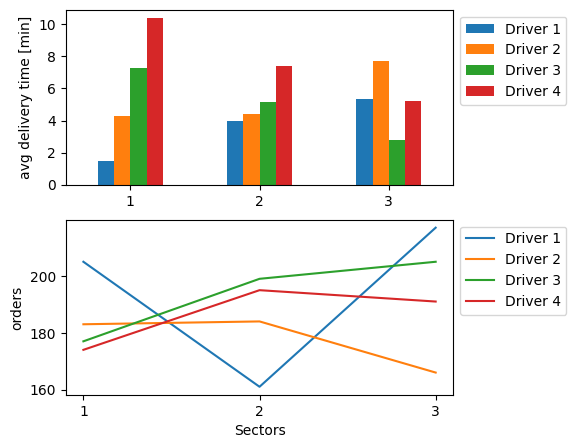

In [8]:
sectors = avg_del_by_driver["sector_id"].unique()
drivers = avg_del_by_driver["driver_id"].unique()
avg_dt_s = avg_del_by_driver["avg_deliveryTime"].to_list()
dt_set = {}
aorders_set = {}
order_weight_set = {}
for driver_id in drivers:
    dt_set["Driver " + str(driver_id)] = (avg_del_by_driver[avg_del_by_driver["driver_id"] == driver_id].sort_values("sector_id")["avg_deliveryTime"] / 60).to_list()
    aorders_set["Driver " + str(driver_id)] = avg_del_by_driver[avg_del_by_driver["driver_id"] == driver_id].sort_values("sector_id")["amount_orders"].to_list()
    order_weight_set["Driver " + str(driver_id)] = (avg_del_by_driver[avg_del_by_driver["driver_id"] == driver_id].sort_values("sector_id")["avg_order_weight"] /1000).to_list()
    
print(dt_set, aorders_set, order_weight_set)
sf_plot = pd.DataFrame(dt_set, index=sectors)
ao_plot = pd.DataFrame(aorders_set, index=sectors)
fig, axes = plt.subplots(nrows=2)
fig.set_figheight(5)
fig.set_figwidth(5)
sf_plot.plot.bar(rot=0, ax=axes[0])
ao_plot.plot(ax=axes[1] )
axes[1].set_xlabel("Sectors")
axes[0].set_ylabel("avg delivery time [min]")
axes[1].set_ylabel("orders")
axes[1].set_xticks(sectors)
axes[0].legend(bbox_to_anchor=(1, 1))
axes[1].legend(bbox_to_anchor=(1, 1))

Text(0.5, 0, 'sector')

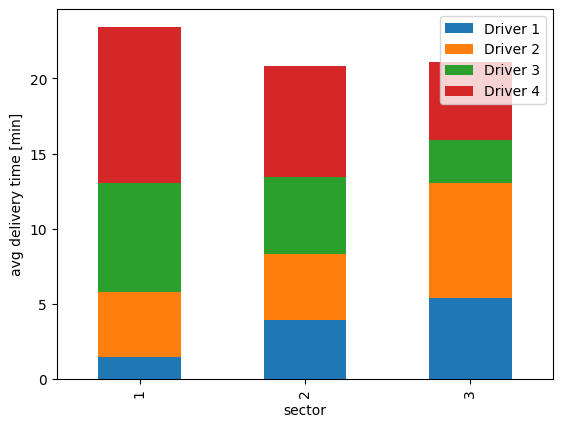

In [9]:
ax = sf_plot.plot.bar(stacked=True)
ax.set_ylabel("avg delivery time [min]")
ax.set_xlabel("sector")

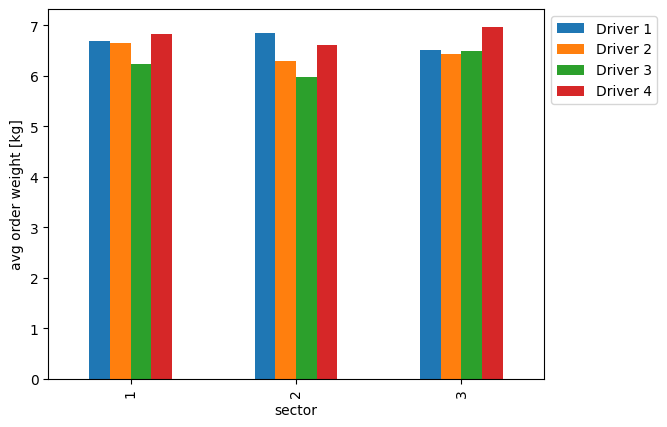

In [10]:
ow_plot = pd.DataFrame(order_weight_set, index=sectors)
ax = ow_plot.plot.bar()
ax.set_ylabel("avg order weight [kg]")
ax.set_xlabel("sector")
ax.legend(bbox_to_anchor=(1, 1))

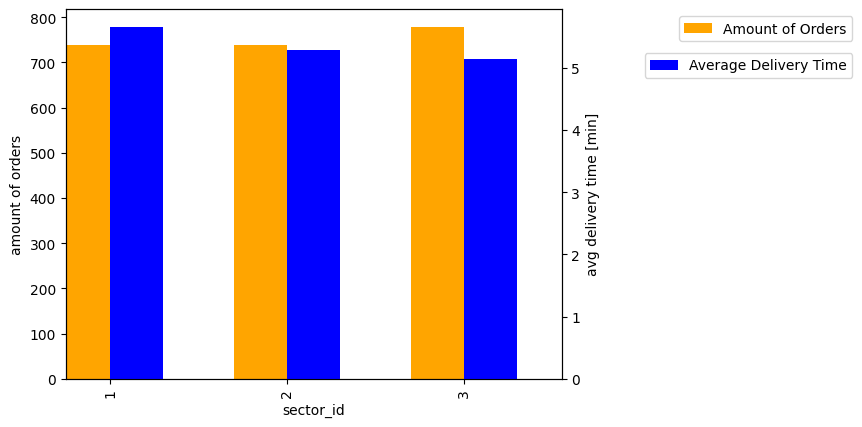

In [11]:
width = 0.3
fig, ax1 = plt.subplots()
avg_deliveryTime = avg_del_by_sector["avg_deliveryTime"] /60 

plt.xticks(rotation=90)
ax1.margins(0.05)
ax1.set_xlabel("Sectors")
ax1.set_ylabel("amount of orders")

ax2 = ax1.twinx()
ax2.set_ylabel("avg delivery time [min]")

avg_del_by_sector.amount_orders.plot(kind='bar', color='orange', ax=ax1, width=width, position=1, label="Amount of Orders", rot=90)
avg_deliveryTime.plot(kind='bar', color='blue', ax=ax2, width=width, position=0, label="Average Delivery Time", rot=90)

ax1.legend(bbox_to_anchor=(1.6, 1))
ax2.legend(bbox_to_anchor=(1.6, .9))

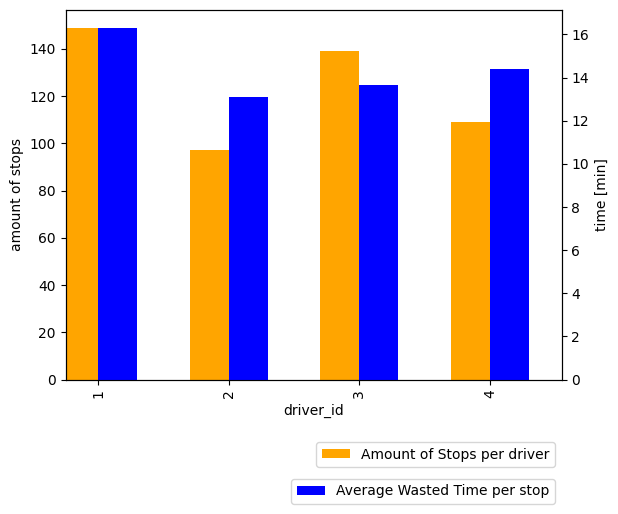

In [12]:
# wastedTime = (wastedT_df["avg_WastedTimeByStop"] / 60).to_list()
# stops = wastedT_df["stops_count"].to_list()

# dt_set = {"Additional Stops": stops, "Avg Time Wasted on break": wastedTime}
# sf_plot = pd.DataFrame(dt_set, index=drivers)

# ax = sf_plot.plot.bar(rot=0)
# ax.set_ylabel("orders")
# ax.set_xlabel("drivers")
# ax.legend(bbox_to_anchor=(1, -.15))

width = 0.3
fig, ax1 = plt.subplots()
wastedTime = wastedT_df["avg_WastedTimeByStop"] / 60

plt.xticks(rotation=90)
ax1.margins(0.05)
ax1.set_xlabel("Sectors")
ax1.set_ylabel("amount of stops")

ax2 = ax1.twinx()
ax2.set_ylabel("time [min]")

wastedT_df.stops_count.plot(kind='bar', color='orange', ax=ax1, width=width, position=1, label="Amount of Stops per driver", rot=90)
wastedTime.plot(kind='bar', color='blue', ax=ax2, width=width, position=0, label="Average Wasted Time per stop", rot=90)

ax1.legend(bbox_to_anchor=(1, -.15))
ax2.legend(bbox_to_anchor=(1, -.25))

-- Select order_id, sum(weight * quantity) as order_weight from orders_products natural left join products group by order_id;
SELECT sector_id, driver_id, AVG((segment_end_time - segment_start_time)) / 60 as avg_deliveryTime, count(*) as amount_orders, order_weight, avg_order_weight  FROM droptime.route_segments natural left join orders natural left join 
( Select order_id, sum(weight * quantity) as order_weight, avg(weight * quantity) as avg_order_weight from orders_products natural left join products group by order_id ) as order_weight
 where segment_type = "STOP" and sector_id is not null group by sector_id, driver_id order by avg_deliveryTime DESC;

[Text(0, 0, '8'),
 Text(0, 0, '484'),
 Text(0, 0, '539'),
 Text(0, 0, '388'),
 Text(0, 0, '277'),
 Text(0, 0, '191'),
 Text(0, 0, '104'),
 Text(0, 0, '52'),
 Text(0, 0, '29'),
 Text(0, 0, '17'),
 Text(0, 0, '8'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '

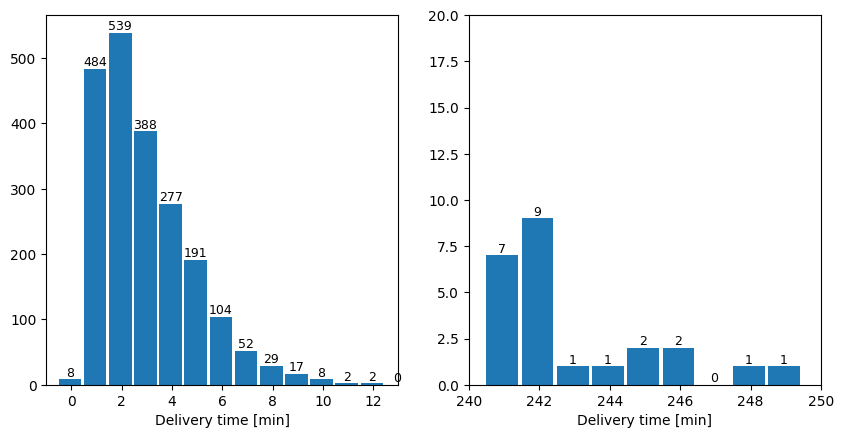

In [13]:
time_order = pd.read_csv("deliveryTime-per-order.csv")
binwidth = 1

fig, axes = plt.subplots(1, 2)
fig.set_figwidth(10)

axes[0].set_xlabel("Delivery time [min]")
axes[1].set_xlabel("Delivery time [min]")

times = (time_order["seconds"] / 60).round()
labels = times.unique()
# bins = max(labels) - min(labels)
bins = np.arange(min(labels)-(binwidth/2), max(labels) + binwidth, binwidth)
# print( labels, max(labels) - min(labels), max(labels), min(labels))

axes[0].set_xlim(left=-1, right=13)
values0, bins0, bars0 = axes[0].hist(times, bins=bins, width=0.9)

axes[1].set_ylim(top=20)
axes[1].set_xlim(left=240, right=250)
axes[1].hist(times, bins=bins, width=0.9)

axes[0].bar_label(bars0, fontsize=9)
axes[1].bar_label(bars0, fontsize=9)

[   3.    2.    1.    0.   -1.   -2.   -3.   -4.   -5.   -6.   -7.   -8.
   -9. -238. -239. -240. -241. -242. -243. -245. -246.] 249.0 3.0 -246.0


[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0

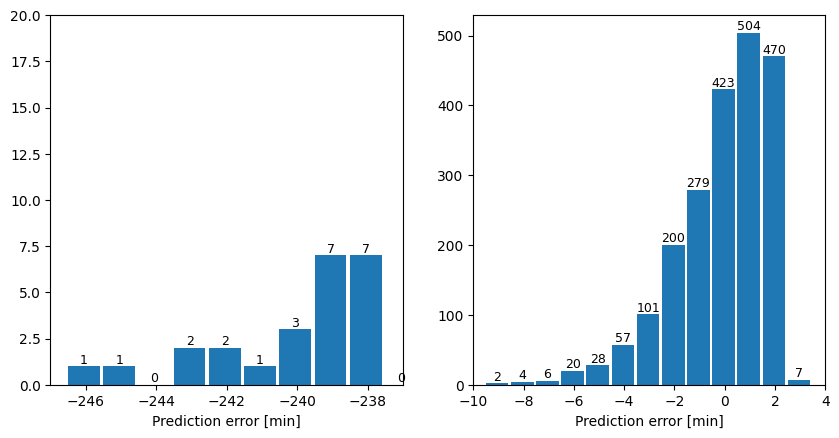

In [14]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(10)

axes[0].set_xlabel("Prediction error [min]")
axes[1].set_xlabel("Prediction error [min]")

times = (time_order["seconds"] / 60).round()
time_diff = (time_order["time_diff"] / 60).round()
labels = time_diff.unique()
# bins = max(labels) - min(labels)
# bins = np.arange(min(labels)-(binwidth/2), max(labels) + binwidth, binwidth)
bins = np.arange(min(labels)-(binwidth/2), max(labels) + binwidth, binwidth)
print( labels, max(labels) - min(labels), max(labels), min(labels))

axes[1].set_xlim(left=-10, right=4)
# values0, bins0, bars0 = axes[0].hist(times, bins=bins, width=0.9)
values0, bins0, bars0 = axes[1].hist(time_diff, bins=bins, width=0.9)

axes[0].set_ylim(top=20)
axes[0].set_xlim(left=-247, right=-237)
axes[0].hist(time_diff, bins=bins, width=0.9)

axes[0].bar_label(bars0, fontsize=9)
axes[1].bar_label(bars0, fontsize=9)